# Query and Download Specified Shapefiles and Tables

In this exercise, you will learn how to query spatial data that is in the form of ESRI Shapefiles. In particular, we will work with Census boundary files in the TIGER (Topologically Integrated Geographic Encoding and Referencing) system.

We will be using the GeoPandas library to read and query these Shapefiles.

In [10]:
import geopandas as gpd
import pandas as pd
pandas.set_option('display.max_rows', None)

### We are going to assign the file to a variable and work with the file by calling that variable whenever needed.

#### For instance,

In [38]:
x = 2

In [39]:
x

2

In [3]:
y = x * 2

In [4]:
y

4

### Similarly, we assign the variable "zipfile" to the file and work with it.

### In this case, the file is saved in the location as this notebook. If in any other location you would need to get the whole path.

## Query the state shapefile to determine the STATEFP value for Indiana

We have already provided the state boundaries shapefile along with this notebook. Next, we will load up this shapefile and query the **STATEFP** field for the state of Indiana

`zip://` simply means we need to treat the file as a zip archive.

`./` means we look in the same directory as this jupyter notebook/tutorial.

`tl_2024_us_state.zip` is the file name along with its extension.  

`gpd.read_file` is how we read the file using *geopandas* in python

In [4]:
zipfile = "zip://./tl_2024_us_state.zip"
states = gpd.read_file(zipfile)

## Inspecting the data in the shapefile

Before running the query, let's first inspect the data available in the shapefile. Here we are inspecting the DataFrame that GeoPandas automatically creates when we open the shapefile using the _read_file_ method.

In [5]:
states

REGION DIVISION STATEFP   STATENS GEOID      GEOIDFQ STUSPS  \
0       3        5      54  01779805    54  0400000US54     WV   
1       3        5      12  00294478    12  0400000US12     FL   
2       2        3      17  01779784    17  0400000US17     IL   
3       2        4      27  00662849    27  0400000US27     MN   
4       3        5      24  01714934    24  0400000US24     MD   
5       1        1      44  01219835    44  0400000US44     RI   
6       4        8      16  01779783    16  0400000US16     ID   
7       1        1      33  01779794    33  0400000US33     NH   
8       3        5      37  01027616    37  0400000US37     NC   
9       1        1      50  01779802    50  0400000US50     VT   
10      1        1      09  01779780    09  0400000US09     CT   
11      3        5      10  01779781    10  0400000US10     DE   
12      4        8      35  00897535    35  0400000US35     NM   
13      4        9      06  01779778    06  0400000US06     CA   
14      1        2      34  01779795    34  0400000US34     NJ   
15      2        3      55  01779806    55  0400000US55     WI   
16      4        9      41  01155107    41  0400000US41     OR   
17      2        4      31  01779792    31  0400000US31     NE   
18      1        2      42  01779798    42  0400000US42     PA   
19      4        9      53  01779804    53  0400000US53     WA   
20      3        7      22  01629543    22  0400000US22     LA   
21      3        5      13  01705317    13  0400000US13     GA   
22      3        6      01  01779775    01  0400000US01     AL   
23      4        8      49  01455989    49  0400000US49     UT   
24      2        3      39  01085497    39  0400000US39     OH   
25      3        7      48  01779801    48  0400000US48     TX   
26      4        8      08  01779779    08  0400000US08     CO   
27      3        5      45  01779799    45  0400000US45     SC   
28      3        7      40  01102857    40  0400000US40     OK   
29      3        6      47  01325873    47  0400000US47     TN   
30      4        8      56  01779807    56  0400000US56     WY   
31      4        9      15  01779782    15  0400000US15     HI   
32      2        4      38  01779797    38  0400000US38     ND   
33      3        6      21  01779786    21  0400000US21     KY   
34      9        0      78  01802710    78  0400000US78     VI   
35      9        0      69  01779809    69  0400000US69     MP   
36      9        0      66  01802705    66  0400000US66     GU   
37      1        1      23  01779787    23  0400000US23     ME   
38      1        2      36  01779796    36  0400000US36     NY   
39      4        8      32  01779793    32  0400000US32     NV   
40      4        9      02  01785533    02  0400000US02     AK   
41      9        0      60  01802701    60  0400000US60     AS   
42      2        3      26  01779789    26  0400000US26     MI   
43      3        7      05  00068085    05  0400000US05     AR   
44      3        6      28  01779790    28  0400000US28     MS   
45      2        4      29  01779791    29  0400000US29     MO   
46      4        8      30  00767982    30  0400000US30     MT   
47      2        4      20  00481813    20  0400000US20     KS   
48      2        3      18  00448508    18  0400000US18     IN   
49      9        0      72  01779808    72  0400000US72     PR   
50      2        4      46  01785534    46  0400000US46     SD   
51      1        1      25  00606926    25  0400000US25     MA   
52      3        5      51  01779803    51  0400000US51     VA   
53      3        5      11  01702382    11  0400000US11     DC   
54      2        4      19  01779785    19  0400000US19     IA   
55      4        8      04  01779777    04  0400000US04     AZ   

                                            NAME LSAD  MTFCC FUNCSTAT  \
0                                  West Virginia   00  G4000        A   
1                                        Florida   00  G4000        A   
2                    

<Axes: >

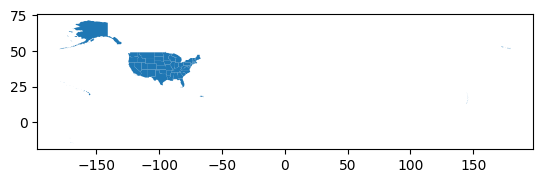

In [7]:
states.plot()

Let's try to filter down to a few relevant columns rather than print the entire table. Does that make it easier to find the one you are interested in?

(24.0, 75.0)

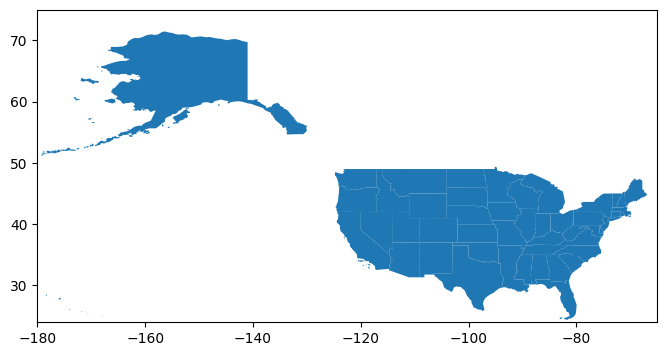

In [21]:
ax = states.plot(figsize=(8,6))
ax.set_xlim([-180, -65])
ax.set_ylim([24, 75])

### To see the column with only the state abbreviations

#### All we need to do is name of the variable we called the file with followed by the column name seperated by a `.`

In [22]:
states.STUSPS

0     WV
1     FL
2     IL
3     MN
4     MD
5     RI
6     ID
7     NH
8     NC
9     VT
10    CT
11    DE
12    NM
13    CA
14    NJ
15    WI
16    OR
17    NE
18    PA
19    WA
20    LA
21    GA
22    AL
23    UT
24    OH
25    TX
26    CO
27    SC
28    OK
29    TN
30    WY
31    HI
32    ND
33    KY
34    VI
35    MP
36    GU
37    ME
38    NY
39    NV
40    AK
41    AS
42    MI
43    AR
44    MS
45    MO
46    MT
47    KS
48    IN
49    PR
50    SD
51    MA
52    VA
53    DC
54    IA
55    AZ
Name: STUSPS, dtype: object

Were you able to find the row for Indiana and the value for STATEFP? Let's try and do the same with code now:

In [42]:
states[states.STUSPS =='IN']['STATEFP'].values[0]

'18'

### Square brackets are used to filter values based on the desired input of the geopandas dataframe.

#### For instance, we are plotting the boundaries of the state of Indiana here.

<Axes: >

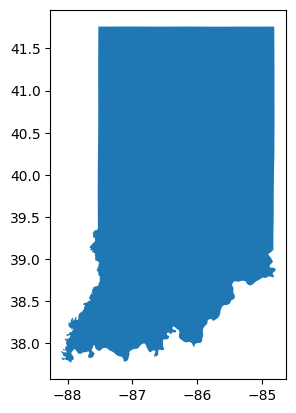

In [ ]:
states[states.STUSPS =='IN'].plot()

<Axes: >

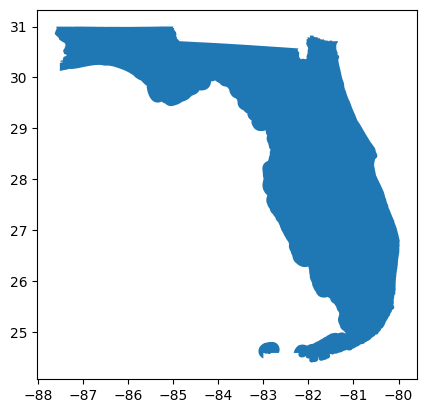

In [ ]:
states[states.STUSPS =='FL'].plot()

### purple square brackets here is to indicate a list of column names that we want to be filtered from the whole file.

In [ ]:
states[['STUSPS','NAME','STATEFP']]

STUSPS                                          NAME STATEFP
0      WV                                 West Virginia      54
1      FL                                       Florida      12
2      IL                                      Illinois      17
3      MN                                     Minnesota      27
4      MD                                      Maryland      24
5      RI                                  Rhode Island      44
6      ID                                         Idaho      16
7      NH                                 New Hampshire      33
8      NC                                North Carolina      37
9      VT                                       Vermont      50
10     CT                                   Connecticut      09
11     DE                                      Delaware      10
12     NM                                    New Mexico      35
13     CA                                    California      06
14     NJ                                    New Jersey      34
15     WI                                     Wisconsin      55
16     OR                                        Oregon      41
17     NE                                      Nebraska      31
18     PA                                  Pennsylvania      42
19     WA                                    Washington      53
20     LA                                     Louisiana      22
21     GA                                       Georgia      13
22     AL                                       Alabama      01
23     UT                                          Utah      49
24     OH                                          Ohio      39
25     TX                                         Texas      48
26     CO                                      Colorado      08
27     SC                                South Carolina      45
28     OK                                      Oklahoma      40
29     TN                                     Tennessee      47
30     WY                                       Wyoming      56
31     HI                                        Hawaii      15
32     ND                                  North Dakota      38
33     KY                                      Kentucky      21
34     VI                  United States Virgin Islands      78
35     MP  Commonwealth of the Northern Mariana Islands      69
36     GU                                          Guam      66
37     ME                                         Maine      23
38     NY                                      New York      36
39     NV                                        Nevada      32
40     AK                                        Alaska      02
41     AS                                American Samoa      60
42     MI                                      Michigan      26
43     AR                                      Arkansas      05
44     MS                                   Mississippi      28
45     MO                                      Missouri      29
46     MT                                       Montana      30
47     KS                                        Kansas      20
48     IN                                       Indiana      18
49     PR                                   Puerto Rico      72
50     SD                                  South Dakota      46
51     MA                                 Massachusetts      25
52     VA                                      Virginia      51
53     DC                          District of Columbia      11
54     IA                                          Iowa      19
55     AZ                                       Arizona      04

## Exercise 1

Download the zip file for the County boundaries, upload it to Jupyter, and repeat the steps above to load the file into a GeoPandas DataFrame

In [ ]:
zipfile = "zip:///home/jovyan/<county zip file name>"
counties =

Next, can you write code to query the counties data frame to find the Hamilton county in Indiana?

**Hint:** What if you filtered by the _STATEFP_ value for Indiana that you identified previously?

**Hint:** Try to only retrieve the columns you need (e.g. COUNTYFP, NAME)

Your code should look something like this:

``
counties[<condition>][[<list of columns>]]
``

In [ ]:
# Enter your code here

It is also possible to combine multiple conditions into a query on the dataframe, try typing in the following into the next cell:

``
counties.loc[(counties['STATEFP'] == '18') & (counties['NAME'] == 'Hamilton')]['COUNTYFP'].values[0]
``

In [ ]:
# Enter your code here

## Exercise 2

Download the zip file for the Roads in Hamilton county. Next, upload it to Jupyter and read the file using GeoPandas.

**Hint:** Use the STATEFP and COUNTYFP codes to identify the right zip file to download.

In [23]:
zipfile = "zip://./tl_2019_12047_roads.zip"
roads = gpd.read_file(zipfile)

In [26]:
roads

LINEARID                   FULLNAME RTTYP  MTFCC  \
0       11055235642               Berry St Exd     M  S1400   
1       11055235968             Suwanee St Exd     M  S1400   
2       11055233666              Old US Hwy 41     U  S1400   
3     1102652640573        Lake Country Blvd S     M  S1400   
4       11055236318  Martin Luther King Dr N E     M  S1400   
5       11055236068                1st Ave S E     M  S1400   
6     1103690712724                3rd Ave N W     M  S1400   
7       11055236075                6th Ave N W     M  S1400   
8       11055236070                38th Dr N W     M  S1400   
9     1102155836339                Hatley St W     M  S1400   
10    1105060046602           107th Avenue S W     M  S1400   
11      11055235993                 8th St S W     M  S1400   
12      11055234193                 2nd Ave NE     M  S1400   
13      11055236044             Railroad St NE     M  S1400   
14    1103690713045                  1st St NE     M  S1400   
15    1103387758806                 1st Ave NE     M  S1400   
16      11055234668                31st Ter NE     M  S1400   
17    1104259377783                  2nd St NE     M  S1400   
18      11055234220                  3rd St NE     M  S1400   
19      11055235863             Central Ave NE     M  S1400   
20    1105646215634                 1st Ave NE     M  S1400   
21      11055234279                  5th St NW     M  S1400   
22      11055234255                  4th St NW     M  S1400   
23      11055234369                 9th Ave NW     M  S1400   
24    1102304428863                  2nd St NW     M  S1400   
25      11055234572                24th Ter NW     M  S1400   
26      11055234800                39th Trl NW     M  S1400   
27      11055234252                 4th Ave NW     M  S1400   
28      11055234406                10th Ave NW     M  S1400   
29    1102304420657                11th Ave NW     M  S1400   
30      11055234464                16th Ave NW     M  S1400   
31      11055234331                  7th St NW     M  S1400   
32      11055234250                 4th Ave NW     M  S1400   
33      11055234368                 9th Ave NW     M  S1400   
34    1102304420658                11th Ave NW     M  S1400   
35    1102652644581                 8th Ave NW     M  S1400   
36      11055234297                  6th St NW     M  S1400   
37      11055234465                 16th St NW     M  S1400   
38    1105598248465                  2nd St NW     M  S1400   
39      11055234671                31st Ter NW     M  S1400   
40    1102304418894                 7th Ave NW     M  S1400   
41    1102652644580                 8th Ave NW     M  S1400   
42    1103916656090               First Ave NW     M  S1400   
43    1102304427775                  1st St NW     M  S1400   
44      11055234407                10th Ave NW     M  S1400   
45    1102304416899                  3rd St NW     M  S1400   
46      11055234455                15th Ave NW     M  S1400   
47      11055234332                  7th St NW     M  S1400   
48      11055235225                 79th Pl NW     M  S1400   
49      11055234276                 5th Ave NW     M  S1400   
50      11055234202                 2nd Ave NW     M  S1400   
51    1105646220226                 1st Ave NW     M  S1400   
52    1102304427770                  1st St NW     M  S1400   
53    1102304427773                  1st St NW     M  S1400   
54    1106092768980                  3rd St NW     M  S1400   
55      11055234330                  7th St NW     M  S1400   
56      11055234294                 6th Ave NW     M  S1400   
57      11055234251                 4th Ave NW     M  S1400   
58      11055234435                13th Ave NW     M  S1400   
59      11055234427                12th Ave NW     M  S1400   
60      11055235865             Central Ave NW     M  S1400   
61      11055234223                 3rd Ave NW     M  S1400   
62    1106087873427                 1st Av

Inspect the data frame, but make sure to restrict the number of rows displayed

**Hint:** reset display.max_rows to 50

In [24]:
# Enter your code here
roads.head(50)

LINEARID                   FULLNAME RTTYP  MTFCC  \
0     11055235642               Berry St Exd     M  S1400   
1     11055235968             Suwanee St Exd     M  S1400   
2     11055233666              Old US Hwy 41     U  S1400   
3   1102652640573        Lake Country Blvd S     M  S1400   
4     11055236318  Martin Luther King Dr N E     M  S1400   
5     11055236068                1st Ave S E     M  S1400   
6   1103690712724                3rd Ave N W     M  S1400   
7     11055236075                6th Ave N W     M  S1400   
8     11055236070                38th Dr N W     M  S1400   
9   1102155836339                Hatley St W     M  S1400   
10  1105060046602           107th Avenue S W     M  S1400   
11    11055235993                 8th St S W     M  S1400   
12    11055234193                 2nd Ave NE     M  S1400   
13    11055236044             Railroad St NE     M  S1400   
14  1103690713045                  1st St NE     M  S1400   
15  1103387758806                 1st Ave NE     M  S1400   
16    11055234668                31st Ter NE     M  S1400   
17  1104259377783                  2nd St NE     M  S1400   
18    11055234220                  3rd St NE     M  S1400   
19    11055235863             Central Ave NE     M  S1400   
20  1105646215634                 1st Ave NE     M  S1400   
21    11055234279                  5th St NW     M  S1400   
22    11055234255                  4th St NW     M  S1400   
23    11055234369                 9th Ave NW     M  S1400   
24  1102304428863                  2nd St NW     M  S1400   
25    11055234572                24th Ter NW     M  S1400   
26    11055234800                39th Trl NW     M  S1400   
27    11055234252                 4th Ave NW     M  S1400   
28    11055234406                10th Ave NW     M  S1400   
29  1102304420657                11th Ave NW     M  S1400   
30    11055234464                16th Ave NW     M  S1400   
31    11055234331                  7th St NW     M  S1400   
32    11055234250                 4th Ave NW     M  S1400   
33    11055234368                 9th Ave NW     M  S1400   
34  1102304420658                11th Ave NW     M  S1400   
35  1102652644581                 8th Ave NW     M  S1400   
36    11055234297                  6th St NW     M  S1400   
37    11055234465                 16th St NW     M  S1400   
38  1105598248465                  2nd St NW     M  S1400   
39    11055234671                31st Ter NW     M  S1400   
40  1102304418894                 7th Ave NW     M  S1400   
41  1102652644580                 8th Ave NW     M  S1400   
42  1103916656090               First Ave NW     M  S1400   
43  1102304427775                  1st St NW     M  S1400   
44    11055234407                10th Ave NW     M  S1400   
45  1102304416899                  3rd St NW     M  S1400   
46    11055234455                15th Ave NW     M  S1400   
47    11055234332                  7th St NW     M  S1400   
48    11055235225                 79th Pl NW     M  S1400   
49    11055234276                 5th Ave NW     M  S1400   

                                             geometry  
0   LINESTRING (-83.1063 30.60125, -83.10631 30.60...  
1   LINESTRING (-82.74859 30.3326, -82.74815 30.33...  
2   LINESTRING (-83.09113 30.58506, -83.09123 30.5...  
3   LINESTRING (-83.19231 30.56553, -83.19277 30.5...  
4   LINESTRING (-82.94337 30.5168, -82.9435 30.516...  
5   LINESTRING (-82.94728 30.51303, -82.94727 30.5...  
6   LINESTRING (-82.95003 30.5249, -82.95003 30.52...  
7   LINESTRING (-82.94889 30.52393, -82.94867 30.5...  
8   LINESTRING (-82.94637 30.52623, -82.94639 30.5...  
9   LINESTRING (-82.95166 30.51847, -82.9518 30.5185)  
10  LINESTRING (-82.95517 30.49708, -82.95506 30.4...  
11  LINESTRING (-82.95296 30.51201, -82.95314 30.5...  
12  LINESTRING (-82.94576 30.518, -82.94573 30.518...  
13  LINESTRING (-82.94549 30.52386, -82.94548 30.5...  
14  LINESTRING (-82.9456 30.5189, -82.94579 30.518...  
1

This shapefile comprises roads of different types. Let's try to figure out what these types are.

**Hint:** You can call the unique() function on a particular field from a dataframe to get an array of unique values of that field/column.

In [ ]:
# Enter your code here

If you want to figure out what these various road types refer to, take a look at the Route Types code list here: https://www.census.gov/library/reference/code-lists.html

## Exercise 3

We will now plot the roads of Hamilton county on a map. However, we will only plot roads of a particular type (e.g. interstate).

In [30]:
import folium # interactive map

In [37]:
roads.RTTYP.unique() # this is to see which are unique values in this column

array(['M', 'U', 'C', 'S', None, 'I'], dtype=object)

In [35]:
m = folium.Map(location=[30.4899, -82.9502], zoom_start=10, tiles="CartoDB dark_matter")
interstates = roads[roads.RTTYP == 'M']
for _, r in interstates.iterrows():
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    sim_geo = gpd.GeoSeries(r["geometry"])
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j)
    folium.Popup(r["FULLNAME"]).add_to(geo_j)
    geo_j.add_to(m)
m